In [1]:
import warnings
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import Dense, LSTM

warnings.simplefilter("ignore")

from matplotlib.pyplot import figure
from matplotlib import style
plt.style.use('seaborn')

In [2]:
x = []

In [3]:
for t in range(1000):
    xsin = (math.sin(t/5)+1)/2
    x.append(xsin)

<function matplotlib.pyplot.show(close=None, block=None)>

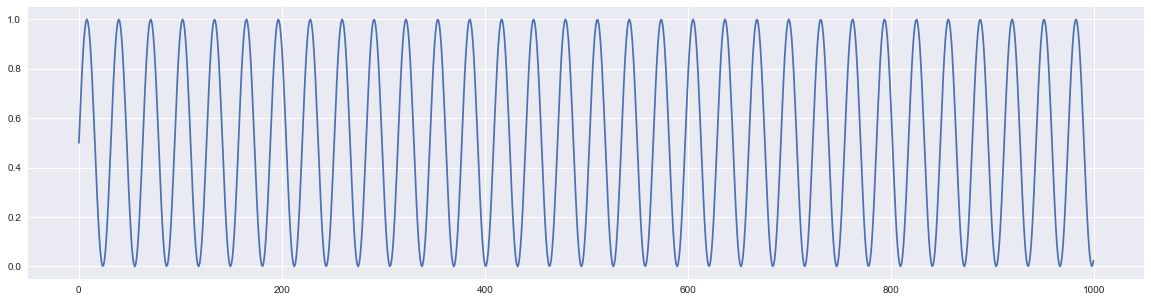

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show

In [5]:
for t in range(70):
    x[100+t]=0

<function matplotlib.pyplot.show(close=None, block=None)>

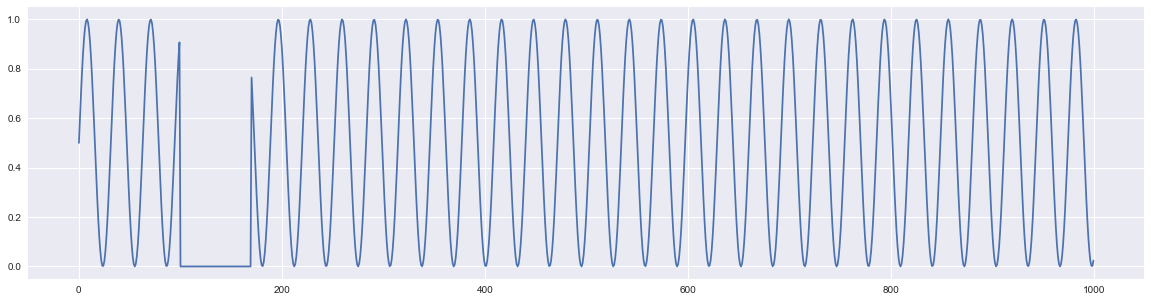

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show

In [7]:
for t in range(90):
    x[300+t]=0

<function matplotlib.pyplot.show(close=None, block=None)>

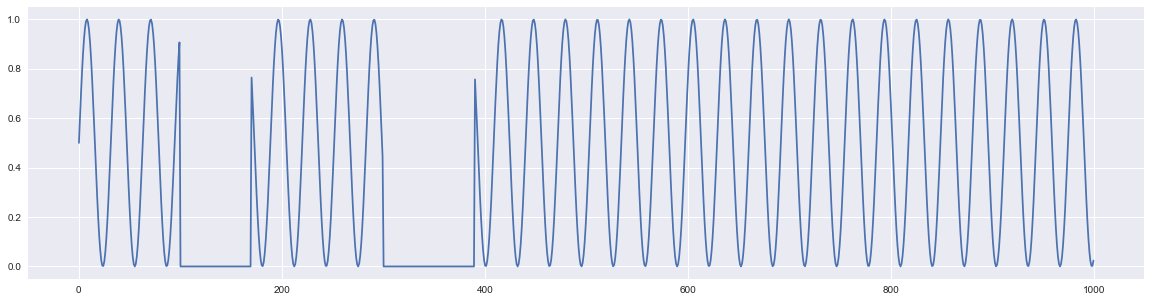

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show

In [9]:
for t in range(50):
    x[550+t]=0

<function matplotlib.pyplot.show(close=None, block=None)>

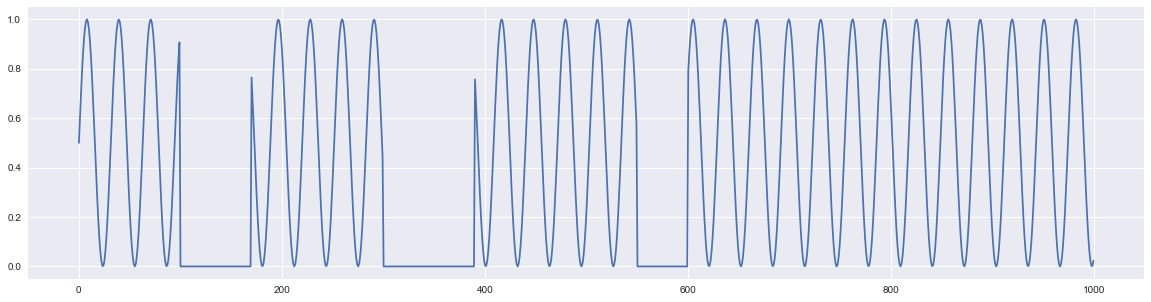

In [10]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show

In [11]:
for t in range(60):
    x[730+t]=0

<function matplotlib.pyplot.show(close=None, block=None)>

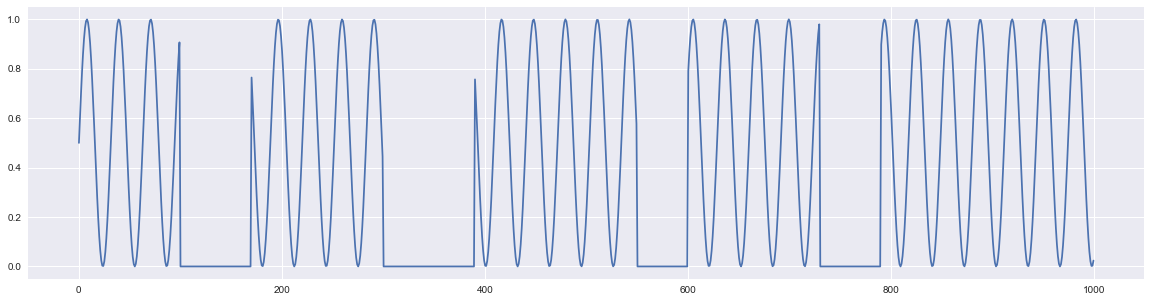

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show

In [13]:
for t in range(45):
    x[890+t]=0

<function matplotlib.pyplot.show(close=None, block=None)>

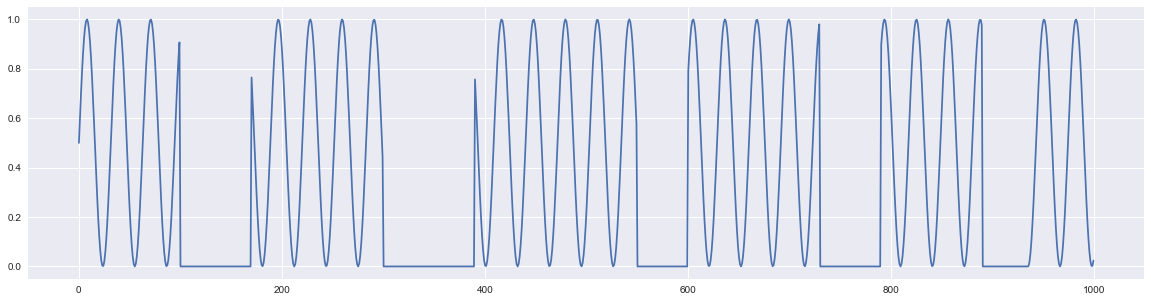

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show

In [15]:
bool_poco = np.array([1 if a > 0 else 0 for a in x])

<function matplotlib.pyplot.show(close=None, block=None)>

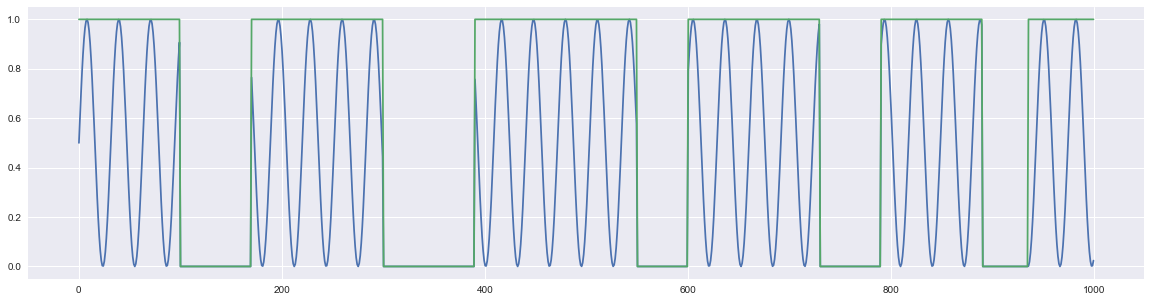

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.plot(bool_poco)
plt.show

In [17]:
x = np.array(x)

In [18]:
#x = x.T

In [19]:
x

array([5.00000000e-01, 5.99334665e-01, 6.94709171e-01, 7.82321237e-01,
       8.58678045e-01, 9.20735492e-01, 9.66019543e-01, 9.92724865e-01,
       9.99786802e-01, 9.86923815e-01, 9.54648713e-01, 9.04248202e-01,
       8.37731590e-01, 7.57750686e-01, 6.67494075e-01, 5.70560004e-01,
       4.70812928e-01, 3.72229449e-01, 2.78739778e-01, 1.94071055e-01,
       1.21598752e-01, 6.42121138e-02, 2.41989631e-02, 3.15449818e-03,
       1.91769558e-03, 2.05378627e-02, 5.82726721e-02, 1.13617756e-01,
       1.84366681e-01, 2.67698910e-01, 3.60292251e-01, 4.58455299e-01,
       5.58274602e-01, 6.55770682e-01, 7.47056676e-01, 8.28493299e-01,
       8.96833932e-01, 9.49354048e-01, 9.83959836e-01, 9.99271673e-01,
       9.94679123e-01, 9.70365278e-01, 9.27299454e-01, 8.67198549e-01,
       7.92458596e-01, 7.06059243e-01, 6.11444957e-01, 5.12387713e-01,
       4.12836609e-01, 3.16760435e-01, 2.27989445e-01, 1.50062656e-01,
       8.60867655e-02, 3.86122892e-02, 9.53188497e-03, 4.89672465e-06,
      

In [20]:
#bool_poco = bool_poco.T

In [21]:
x = x[:, np.newaxis]

In [22]:
#bool_poco.reshape(-1,1,1)
y = bool_poco[:, np.newaxis]


In [23]:
serie = np.hstack((x, y))

In [24]:
serie.shape

(1000, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

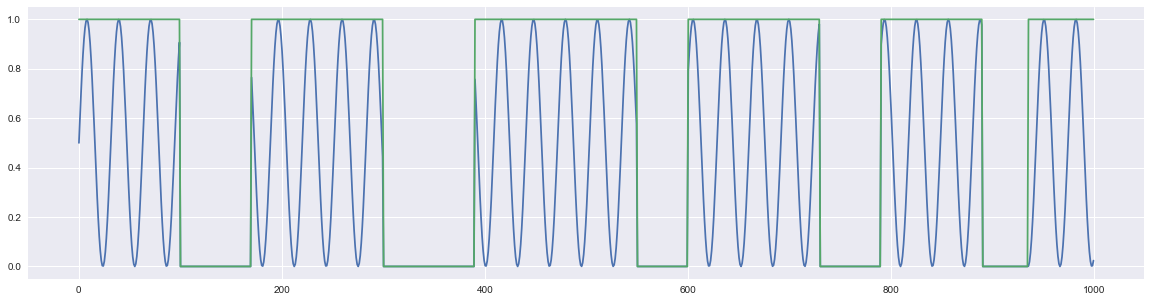

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(serie)
plt.show

In [26]:
serie.shape

(1000, 2)

In [27]:
serie

array([[0.5       , 1.        ],
       [0.59933467, 1.        ],
       [0.69470917, 1.        ],
       ...,
       [0.00207489, 1.        ],
       [0.00296005, 1.        ],
       [0.02366063, 1.        ]])

In [28]:
def set_seq(seq, look_back, foward_days):
    '''Função para criar dataset de treino
       inputs:
           seq = Série temporal
           look_back = Número de índices que iremos avaliar para predizer o seguinte
           
       outputs:
           X = lista contendo todos os pedaços da série com tamanho look_back
           Y = lista contendo todos os itens seguintes às séries alocadas em X, de acordo com o índice'''
    
    X = []
    y = []
    
    # Andando por toda série temporal
    # Como precisamos de look_back índices para iniciar, precisamos retirar look_back do len(seq)
    for t in range(len(seq) - look_back - foward_days):
    
            # end se refere ao índice do último item do pedaço da série temporal de tamanho look_back
            end = t + look_back
            
            # Verificando se o ínidice do último item está além da série temporal
            if end + foward_days > (len(seq) - 1):
                break
            
            # Xseq é o pedaço da série temporal iniciando em t (loop for) e terminando em end (definido acima)
            Xseq = seq[t:end, :]
            
            
            
            #y_target é o item da série temporal imediatamente seguinte ao pedaço da série escolhido para Xseq
            y_target = seq[end:(end+foward_days), 0]
            
            # Appendando Xseq e y_target nas listas acima
            X.append(Xseq)
            y.append(y_target)
        
    return np.array(X), np.array(y) 

In [29]:
corte_teste = 800

foward_days = 100 # quantidade de dias a frente que queremos prever
look_back = 1*foward_days # quantidade de passos de tempo que estamos olhando para trás para realizar a previsão (Em função do foward_days)

n_iterations = 5 # Quantos blocos a frente queremos prever, utilizando sempre a última predição como input

thr = 0.10 # Definindo o threshold

media_movel_flag = False # False = sem media movel / True = com média movel
media_movel_dias = 10 # quantos dias de média móvel 

In [30]:
serie_train = serie[:corte_teste]
serie_test = serie[corte_teste:]

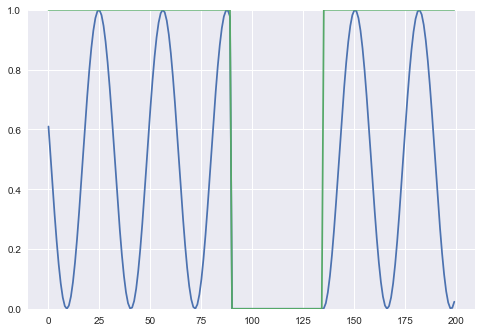

In [31]:
# Plotando as partes da serie para verificar se tá tudo bem
plt.plot(serie_test)
plt.ylim(0, 1)
plt.show()

In [32]:
# Separanto a serie de treino em pedaços para treinamento do modelo
Xaux, Yaux = set_seq(serie_train, look_back, foward_days)